**Introduction:**

The Iris flower dataset, a creation of the esteemed British biologist and statistician Ronald Fisher in his groundbreaking 1936 paper titled "The Use of Multiple Measurements in Taxonomic Problems," continues to hold significant importance. Often referred to as Anderson's Iris dataset, it owes its name to Edgar Anderson, the individual responsible for assembling the data to quantify the intricate morphological distinctions among three interrelated Iris flower species. This dataset, consisting of 150 samples meticulously collected from Iris Setosa, Iris Virginica, and Iris Versicolor, has since become a linchpin for various statistical classification techniques within the realm of machine learning.

**Machine Learning Significance:**

Over time, this dataset has emerged as a quintessential litmus test for numerous statistical classification methodologies in the field of machine learning. Among these techniques, support vector machines stand out prominently. Researchers and practitioners have embraced the Iris dataset as a standard benchmark to calibrate, validate, and optimize classification algorithms. Its inherent complexity and real-world relevance have solidified its position as a yardstick for assessing the efficacy of novel approaches in the realm of statistical learning.

**Dataset Attributes:**

Containing a total of 150 records, the dataset comprises five crucial attributes. These attributes are petal length, petal width, sepal length, sepal width, and class (species) designation. Each of these attributes plays a pivotal role in unraveling the intricate differentiators that distinguish the Iris species from one another. This dataset serves as an invaluable resource for researchers, data scientists, and enthusiasts seeking to explore the interplay between data, classification techniques, and botanical taxonomy.

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Loading the data set to pandas dataframe
df = pd.read_csv("/kaggle/input/iriscsv/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Dropping the Id column as they are invalid to our analysis
df=df.drop(columns=["Id"])

In [4]:
#Provides a basic information about the structure and composition of our data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df['Species'].value_counts()
#Counts the number of inputs cooresponding to each Species

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [6]:
df.isnull().sum()
#There exists no null values

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**Exploratory data analysis**

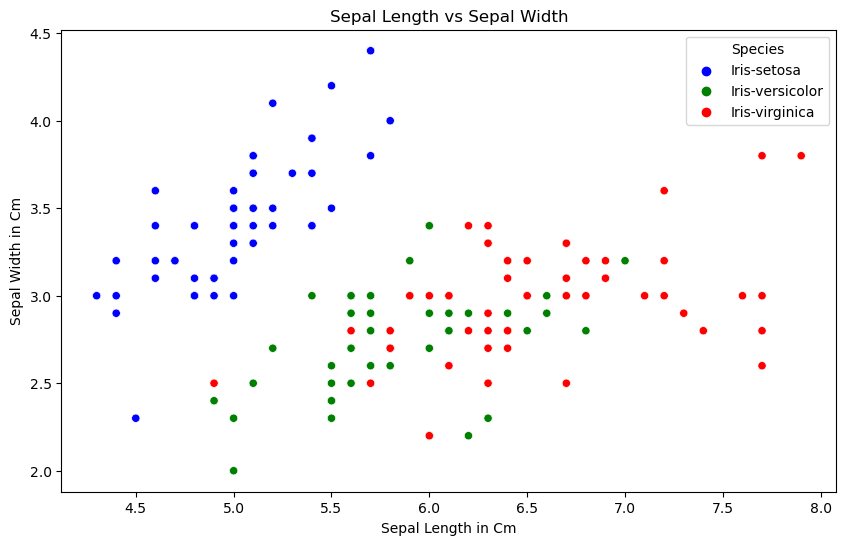

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species', palette=['blue', 'green', 'red'])
plt.xlabel('Sepal Length in Cm')
plt.ylabel('Sepal Width in Cm')
plt.title('Sepal Length vs Sepal Width')
plt.show()

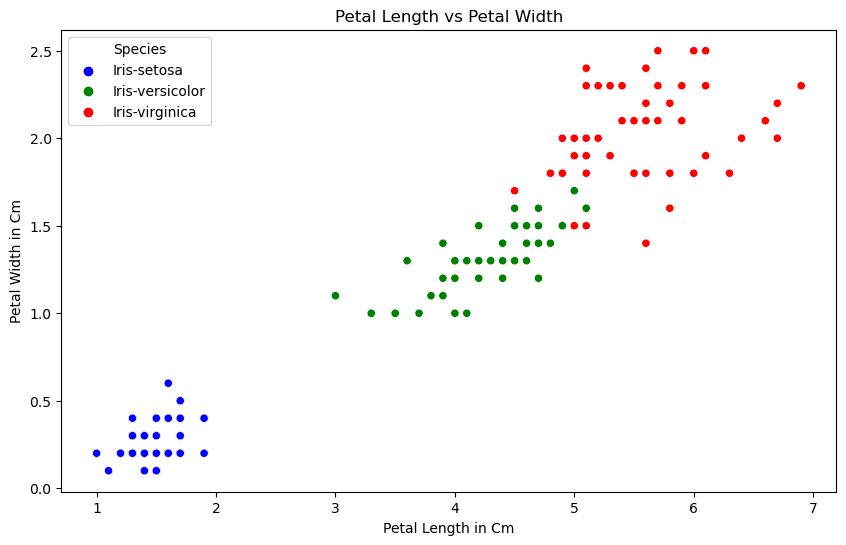

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PetalLengthCm', y='PetalWidthCm', hue='Species', palette=['blue', 'green', 'red'])
plt.xlabel('Petal Length in Cm')
plt.ylabel('Petal Width in Cm')
plt.title('Petal Length vs Petal Width')
plt.show()

Here we can see that the

*   List itemThis shows how the lengths and widths are distributed for each type.
*   List item


petal features give a more efficient division as they are clustered.

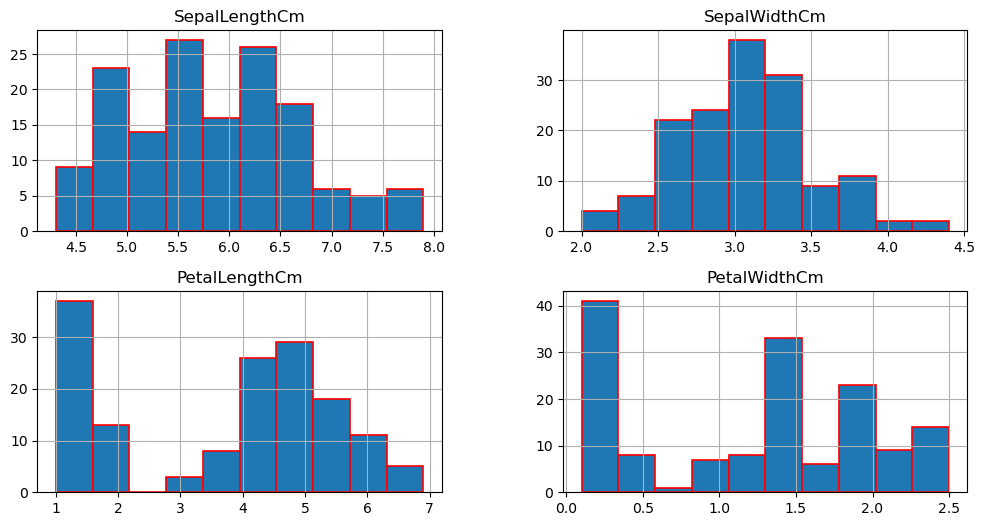

In [9]:
df.hist(edgecolor='red',linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

This shows how the lengths and widths are distributed for each type.

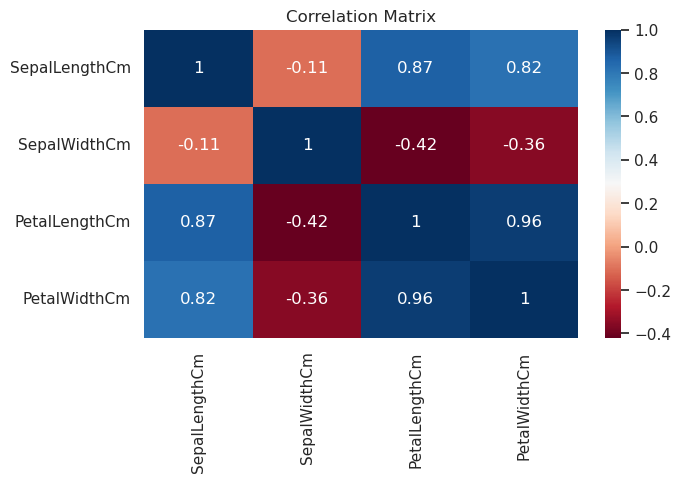

In [10]:
plt.figure(figsize=(7, 4))
sns.set(style="whitegrid")  # Set plot style

corr_matrix = df.corr(numeric_only=True)  # Compute the correlation matrix

sns.heatmap(corr_matrix, annot=True, cmap='RdBu')

plt.title("Correlation Matrix")
plt.show()

We observe that the Sepal Width and Length are not correlated but the Petal Width and Length are highly correlated.

In [11]:
#Splitting data set to train and test data
from sklearn.model_selection import train_test_split

x = df.drop(columns=["Species"])
y = df["Species"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)


In [12]:
y_train.head()

118     Iris-virginica
18         Iris-setosa
4          Iris-setosa
45         Iris-setosa
59     Iris-versicolor
Name: Species, dtype: object

In [13]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

modelA = LogisticRegression(max_iter=1000)  # Increase the number of iterations
modelA.fit(x_train,y_train)
print("Fitting completed")
logisticReg_accuracy = modelA.score(x_test,y_test)*100
print("Accuracy using Logistic Regression: ",logisticReg_accuracy)

Fitting completed
Accuracy using Logistic Regression:  97.77777777777777


In [14]:
#KNN model
from sklearn.neighbors import KNeighborsClassifier
modelB = KNeighborsClassifier(n_neighbors=3)
modelB.fit(x_train,y_train)
print("Fitting completed")

KNN_accuracy = modelB.score(x_test,y_test)*100
print("Accuracy using KNN model: ",KNN_accuracy)

Fitting completed
Accuracy using KNN model:  97.77777777777777


In [15]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
modelC = DecisionTreeClassifier()
modelC.fit(x_train,y_train)
print("Fitting completed")
Decision_accuracy = modelC.score(x_test,y_test)*100
print("Accuracy using Decision tree model: ",Decision_accuracy)

Fitting completed
Accuracy using Decision tree model:  95.55555555555556


In [16]:
#Support vector machines
svm_classifier = SVC(kernel='linear', C=1.0)

svm_classifier.fit(x_train, y_train)
print("Training completed")
y_pred = svm_classifier.predict(x_test)

svm_accuracy = accuracy_score(y_test, y_pred)*100
print(f"Accuracy: {svm_accuracy:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Training completed
Accuracy: 100.00
Confusion Matrix:
 [[14  0  0]
 [ 0 18  0]
 [ 0  0 13]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



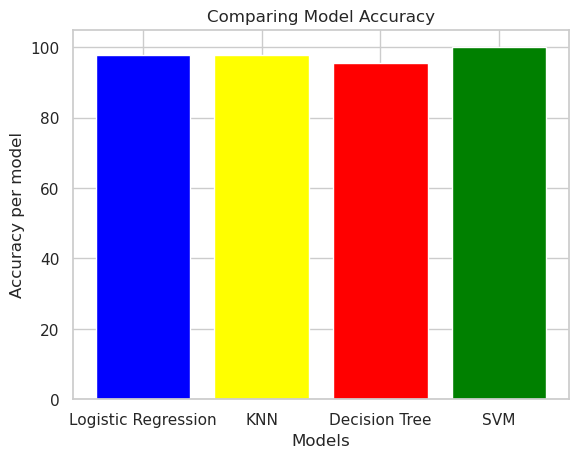

In [17]:
# Model Comparison - Visualization
models = ['Logistic Regression', 'KNN', 'Decision Tree','SVM']
accuracies = [logisticReg_accuracy, KNN_accuracy, Decision_accuracy,svm_accuracy]

plt.bar(models, accuracies, color=['blue', 'yellow', 'red','green'])
plt.xlabel("Models")
plt.ylabel("Accuracy per model")
plt.title("Comparing Model Accuracy")
plt.show()

**Logistic regression and KNN models** are expected to show better output in further classification of the flowers based on new input data.
